<a href="https://colab.research.google.com/github/JonathanKolb/MLNNs_A2/blob/playing-around/best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="loading"></a>
# 1. Load packages and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import save_model, load_model
from tensorflow.random import set_seed
from numpy.random import seed

In [2]:
# Load data as Pandas dataframe
df = pd.read_csv('./train-io.txt', sep=" ", header=None,
                 names=['num_01', 'num_02', 'num_03', 'num_04', 'num_05',
                        'num_06', 'num_07', 'num_08', 'num_09', 'num_10', 'label'])

In [3]:
df.head()

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10,label
0,-0.852507,1.666773,1.804535,-0.716671,1.453874,-2.127368,-1.122697,0.177708,1.100541,1.124238,1
1,-2.457481,1.934705,1.687973,-0.135270,1.834924,-0.646744,0.317887,-1.934858,0.593166,0.432247,0
2,-3.254799,3.487586,3.333810,-0.104991,-0.522417,-3.673875,-3.931949,0.016380,1.955265,1.118143,1
3,-3.204966,3.592170,4.498665,-0.117003,0.539003,-3.146038,-0.655503,-0.692667,0.796502,1.120190,0
4,-1.381102,0.748178,1.732860,-0.288241,0.539120,-1.916870,-1.419793,-0.561423,0.936609,0.289147,1


In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
num_01,100000.0,-2.259926,1.005840,-6.073768,-2.953758,-2.258861,-1.564537,1.337427
num_02,100000.0,2.445663,1.108057,-1.250762,1.655183,2.444047,3.238214,5.997658
num_03,100000.0,2.874081,1.324896,-2.072370,1.951810,2.878329,3.800928,7.739980
num_04,100000.0,-0.230782,0.478650,-2.073440,-0.563800,-0.232659,0.101010,1.494884
num_05,100000.0,0.592157,0.949180,-2.821405,-0.060338,0.591340,1.245209,4.037723
num_06,100000.0,-2.450873,1.194906,-6.810437,-3.273778,-2.453019,-1.625890,1.994193
num_07,100000.0,-1.117645,1.152760,-5.033446,-1.921612,-1.115276,-0.313028,2.998529
num_08,100000.0,-0.637249,0.634570,-2.860057,-1.082620,-0.637222,-0.191713,1.521207
num_09,100000.0,0.972720,0.530816,-1.073676,0.606474,0.970453,1.343528,2.977788
num_10,100000.0,0.689605,0.686217,-1.647074,0.212772,0.691525,1.168163,3.240423


# 2. Preprocessing

Rescale the numbers using the standard scaler from SKLearn

In [5]:
continuous = ['num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [6]:
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
num_01,100000.0,-8.855139e-18,1.000005,-3.791718,-0.689807,0.001059,0.691355,3.576484
num_02,100000.0,-1.097078e-16,1.000005,-3.335969,-0.713396,-0.001458,0.715266,3.205623
num_03,100000.0,2.216538e-16,1.000005,-3.733484,-0.696112,0.003207,0.699566,3.672684
num_04,100000.0,-3.510081e-17,1.000005,-3.849718,-0.695748,-0.003923,0.693185,3.605293
num_05,100000.0,-4.021672e-17,1.000005,-3.596346,-0.687433,-0.000861,0.688020,3.630063
num_06,100000.0,-1.440270e-16,1.000005,-3.648476,-0.688681,-0.001796,0.690420,3.720031
num_07,100000.0,5.684342e-17,1.000005,-3.396909,-0.697431,0.002055,0.697995,3.570731
num_08,100000.0,-1.926992e-16,1.000005,-3.502873,-0.701850,0.000042,0.702110,3.401463
num_09,100000.0,3.959499e-17,1.000005,-3.855209,-0.689971,-0.004271,0.698567,3.777350
num_10,100000.0,1.072209e-16,1.000005,-3.405179,-0.694876,0.002797,0.697389,3.717238


Make a train-test split.

In [7]:
X=df[['num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10']]
y=df['label']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.1, 
                                   shuffle=True)
  
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
         num_01    num_02    num_03    num_04    num_05    num_06    num_07  \
51994  1.585163 -1.492439 -0.756945  0.283608  0.843370 -0.124739  0.985887   
77540 -1.176499  1.211352  1.209995 -0.546053 -0.304328  0.028761  0.950915   
16382 -1.306078  0.291830  1.270650 -0.623350  0.276613 -0.734683 -0.492006   
83439  0.866951 -0.038739  0.256634  0.648820  0.445939 -0.136365  0.048721   
61618  0.267588 -0.902006 -0.603416 -0.283531 -0.809321  0.225408 -0.407252   

         num_08    num_09    num_10  
51994 -0.732186 -0.517880 -0.826660  
77540 -1.207485 -0.957049 -0.786214  
16382  0.464670  0.290063  1.179366  
83439  1.144486 -0.600542  0.230448  
61618 -0.696148  0.138278 -0.282818  

X_test : 
         num_01    num_02    num_03    num_04    num_05    num_06    num_07  \
75721 -1.110732  0.909671 -0.382519  0.367877 -1.071533  1.257043 -0.732816   
80184  1.581756  0.352322 -1.542950 -0.115110  0.917856  1.350713  0.700714   
19864 -1.266550  0.497932  1.872731 -0

## 3. Neural Network with Cross Validation

### Create neural network model


In [8]:
def create_model(lyrs=[256,128,64,32], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=df[[
        'num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10'
      ]].shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [9]:
model = create_model(lyrs=[256,128,64,32,16], act='relu')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1

### Train model


In [10]:
# train model on full train set, with 80/20 train-test split
training = model.fit(X_train, y_train,
    # df[['num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10']], df['label'],
                     epochs=100, batch_size=128, validation_split=0.2, verbose=2)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

Epoch 1/100
563/563 - 6s - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6927 - val_accuracy: 0.5204 - 6s/epoch - 10ms/step
Epoch 2/100
563/563 - 2s - loss: 0.6923 - accuracy: 0.5207 - val_loss: 0.6914 - val_accuracy: 0.5377 - 2s/epoch - 4ms/step
Epoch 3/100
563/563 - 2s - loss: 0.6902 - accuracy: 0.5328 - val_loss: 0.6871 - val_accuracy: 0.5419 - 2s/epoch - 4ms/step
Epoch 4/100
563/563 - 2s - loss: 0.6837 - accuracy: 0.5534 - val_loss: 0.6808 - val_accuracy: 0.5616 - 2s/epoch - 4ms/step
Epoch 5/100
563/563 - 2s - loss: 0.6695 - accuracy: 0.5684 - val_loss: 0.6590 - val_accuracy: 0.5751 - 2s/epoch - 4ms/step
Epoch 6/100
563/563 - 2s - loss: 0.6552 - accuracy: 0.5791 - val_loss: 0.6460 - val_accuracy: 0.5807 - 2s/epoch - 4ms/step
Epoch 7/100
563/563 - 2s - loss: 0.6470 - accuracy: 0.5870 - val_loss: 0.6426 - val_accuracy: 0.5832 - 2s/epoch - 4ms/step
Epoch 8/100
563/563 - 2s - loss: 0.6427 - accuracy: 0.5909 - val_loss: 0.6419 - val_accuracy: 0.5934 - 2s/epoch - 4ms/step
Epoch 9/100
563

### Assess results

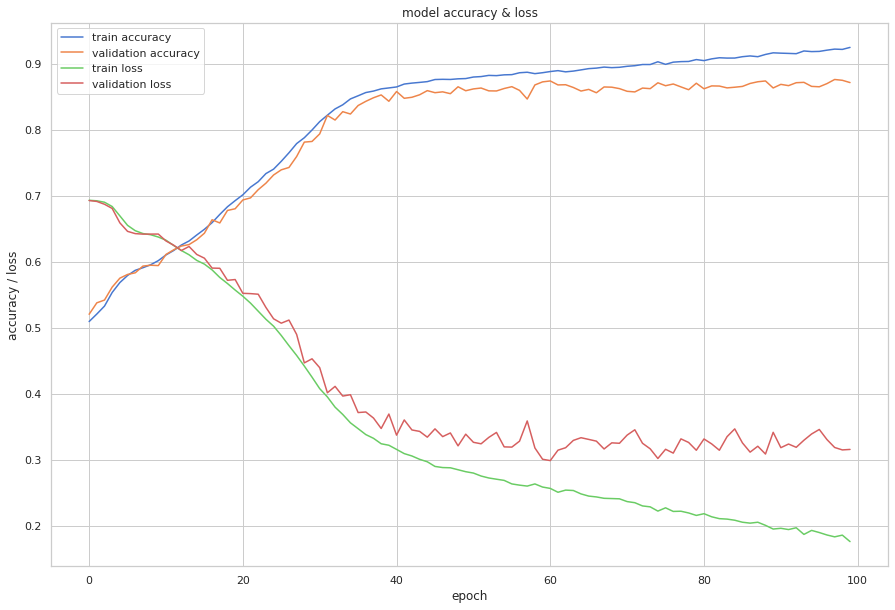

In [11]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy', 'train loss', 'validation loss'], loc='upper left')
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3172 - accuracy: 0.8742


[0.317195326089859, 0.8741999864578247]

In [13]:
# saving the final model
# save_model(model, "./model.h5")

# 4. Make predictions for the unlabeled data

To get the exact same model from my final run load it as follows:
1. Upload the 'model.h5' file to the files.
2. Import the model to the runtime.

In [14]:
model = load_model('model.h5')

Load the data to be predicted

In [15]:
# Load data as Pandas dataframe
unlabeled_data = pd.read_csv('./test-i.txt', sep=" ", header=None,
                 names=['num_01', 'num_02', 'num_03', 'num_04', 'num_05',
                        'num_06', 'num_07', 'num_08', 'num_09', 'num_10'])

In [16]:
unlabeled_data.head(10)

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10
0,-2.594116,1.855527,2.724305,-0.204641,0.774350,-1.975059,-0.769447,-1.855881,0.997831,0.007212
1,-0.940903,1.442394,0.599031,-0.844581,2.981113,0.707824,1.352913,-0.825582,0.198402,0.976310
2,-3.199796,4.878265,3.162526,-1.213153,0.307438,-1.240265,-1.678305,-0.639494,1.108504,1.372675
3,-2.407269,2.823782,4.407804,-0.456866,1.888080,-2.127489,-0.675040,-0.150679,0.546404,1.470138
4,-0.702502,1.580839,2.270906,-0.545130,0.296036,-3.285296,-1.657834,0.045244,1.053267,0.245438
5,-2.691957,3.575437,3.518913,-0.304353,-1.003984,-3.848012,-3.732328,-1.043563,1.884800,0.233058
6,-3.204943,5.161712,2.811713,-0.948767,-0.719065,-1.521608,-2.226328,-0.546484,1.109119,0.991317
7,-3.937514,5.310633,4.188463,-1.002521,0.078249,-2.687297,-1.467165,-1.836831,1.437945,0.364033
8,-1.673174,0.972873,2.540266,0.021879,2.243066,-2.945877,-0.651543,-0.064658,1.138258,1.511876
9,-2.792630,4.945745,3.154692,-1.521820,0.128121,-1.727303,-2.015069,0.073933,1.329041,1.913461


In [17]:
labeled_data = unlabeled_data
labeled_data['output'] = model.predict(labeled_data)
labeled_data['output'] = labeled_data['output'].apply(lambda x: round(x,0)).astype('int')

313/313 [==============================] - 1s 2ms/step


In [18]:
labeled_data.head(10)

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10,output
0,-2.594116,1.855527,2.724305,-0.204641,0.774350,-1.975059,-0.769447,-1.855881,0.997831,0.007212,0
1,-0.940903,1.442394,0.599031,-0.844581,2.981113,0.707824,1.352913,-0.825582,0.198402,0.976310,0
2,-3.199796,4.878265,3.162526,-1.213153,0.307438,-1.240265,-1.678305,-0.639494,1.108504,1.372675,1
3,-2.407269,2.823782,4.407804,-0.456866,1.888080,-2.127489,-0.675040,-0.150679,0.546404,1.470138,0
4,-0.702502,1.580839,2.270906,-0.545130,0.296036,-3.285296,-1.657834,0.045244,1.053267,0.245438,1
5,-2.691957,3.575437,3.518913,-0.304353,-1.003984,-3.848012,-3.732328,-1.043563,1.884800,0.233058,0
6,-3.204943,5.161712,2.811713,-0.948767,-0.719065,-1.521608,-2.226328,-0.546484,1.109119,0.991317,0
7,-3.937514,5.310633,4.188463,-1.002521,0.078249,-2.687297,-1.467165,-1.836831,1.437945,0.364033,0
8,-1.673174,0.972873,2.540266,0.021879,2.243066,-2.945877,-0.651543,-0.064658,1.138258,1.511876,0
9,-2.792630,4.945745,3.154692,-1.521820,0.128121,-1.727303,-2.015069,0.073933,1.329041,1.913461,0


In [19]:
np.savetxt(r'./labels.txt', unlabeled_data.output, fmt='%d')